# Dashboard: ”Early Warning – Mognad i Sveriges öppna data‑diskussioner”

* [#1501](https://github.com/salgo60/DIGG-skuggbacklog/issues/1501)
* Denna Notebook [import pandas as pd](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1489_DIGG_forum.ipynb)
   * se även Notebook [1501_DIGG_forum_tech_debt](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1501_DIGG_forum_tech_debt.ipynb)



In [1]:
import time

from datetime import datetime

now = datetime.now()
timestamp = now.timestamp()

start_time = time.time()
print("Start:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Start: 2025-12-05 05:30:27


In [1]:
import pandas as pd
# 1. läs in
df = pd.read_json("forum_data.json")

# Kolla snabbt
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tid              4063 non-null   int64 
 1   cid              4063 non-null   int64 
 2   slug             4063 non-null   object
 3   topic_title      4063 non-null   object
 4   topic_timestamp  4063 non-null   object
 5   pid              4063 non-null   int64 
 6   post_index       4063 non-null   int64 
 7   post_timestamp   4063 non-null   object
 8   uid              4063 non-null   int64 
 9   content_html     4063 non-null   object
 10  content_len      4063 non-null   int64 
 11  post_date        4063 non-null   int64 
 12  username         3225 non-null   object
 13  username_norm    4063 non-null   object
 14  is_digg          4063 non-null   bool  
 15  post_month       4063 non-null   object
dtypes: bool(1), int64(7), object(8)
memory usage: 480.2+ KB


(    tid  cid                                               slug  \
 0   282   23  282/hjälp-nosad-och-dataportalens-communityfor...   
 1  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 2  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 3  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 4  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 
                                          topic_title  \
 0  Hjälp NOSAD och dataportalens communityforum a...   
 1  Dataportal.se har stöd för Sparql-queries, vis...   
 2  Dataportal.se har stöd för Sparql-queries, vis...   
 3  Dataportal.se har stöd för Sparql-queries, vis...   
 4  Dataportal.se har stöd för Sparql-queries, vis...   
 
             topic_timestamp   pid  post_index            post_timestamp   uid  \
 0  2022-01-11T17:30:39.030Z  1213           0  2022-01-11T17:30:39.030Z    62   
 1  2025-10-06T09:12:42.687Z  5304           0  2025-10-06T09:12:42.687Z   127   


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

df = pd.read_json("forum_data.json")

# Rensa HTML → text
df["content_text"] = df["content_html"].apply(
    lambda x: BeautifulSoup(str(x), "html.parser").get_text(" ", strip=True)
)

df["content_text_norm"] = df["content_text"].str.lower()

# Säkerställ tidsformat
df["post_time"] = pd.to_datetime(df["post_timestamp"], errors="coerce")
df["post_month"] = df["post_time"].dt.to_period("M").astype(str)


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/423341782.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["post_month"] = df["post_time"].dt.to_period("M").astype(str)


In [3]:
eu_terms = [
    "ssot", "single source of truth",
    "dcat", "dcat-ap", "dcterms",
    "pid", "identifier", "uri",
    "skos", "esco", "eurovoc",
    "eli", "eionet", "bathingwateridentifier",
    "eu knowledge graph", "eu pic"
]


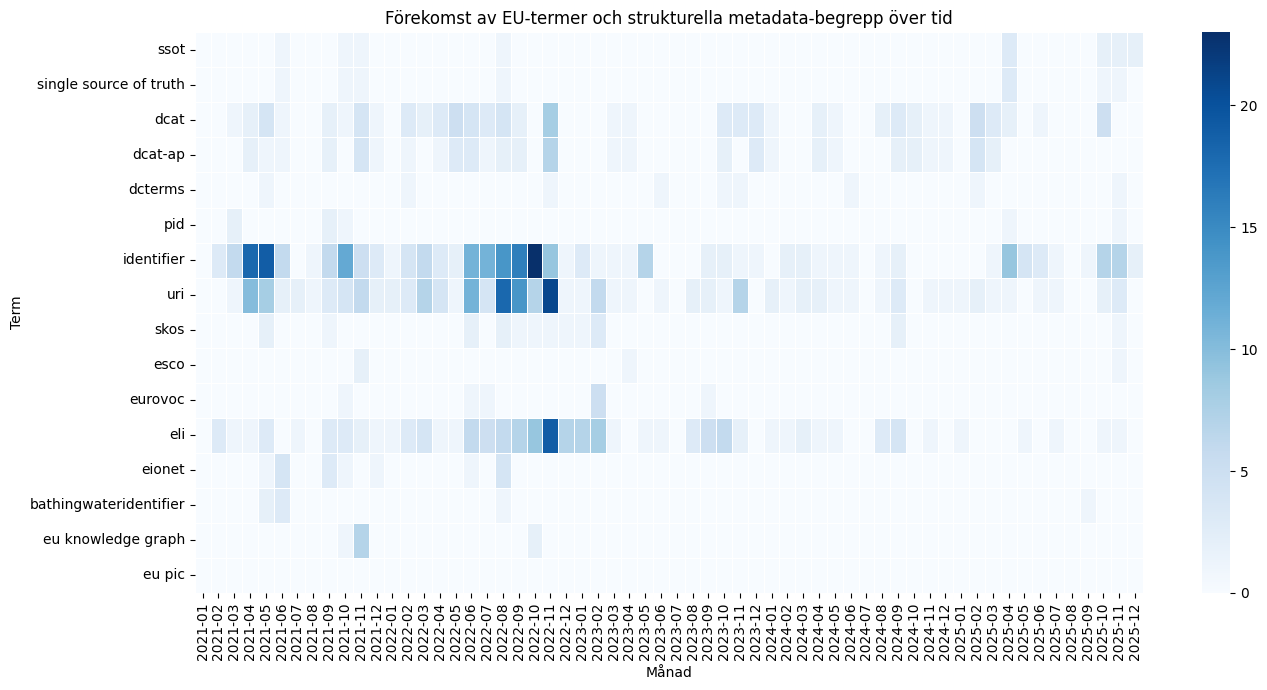

In [4]:
term_matrix = pd.DataFrame()

for term in eu_terms:
    term_matrix[term] = (
        df.groupby("post_month")["content_text_norm"]
        .apply(lambda x: x.str.contains(term).sum())
    )

plt.figure(figsize=(14, 7))
sns.heatmap(term_matrix.T, cmap="Blues", linewidths=.5)
plt.title("Förekomst av EU‑termer och strukturella metadata‑begrepp över tid")
plt.xlabel("Månad")
plt.ylabel("Term")
plt.tight_layout()
plt.savefig("eu_terms_heatmap.png", dpi=200)
plt.show()


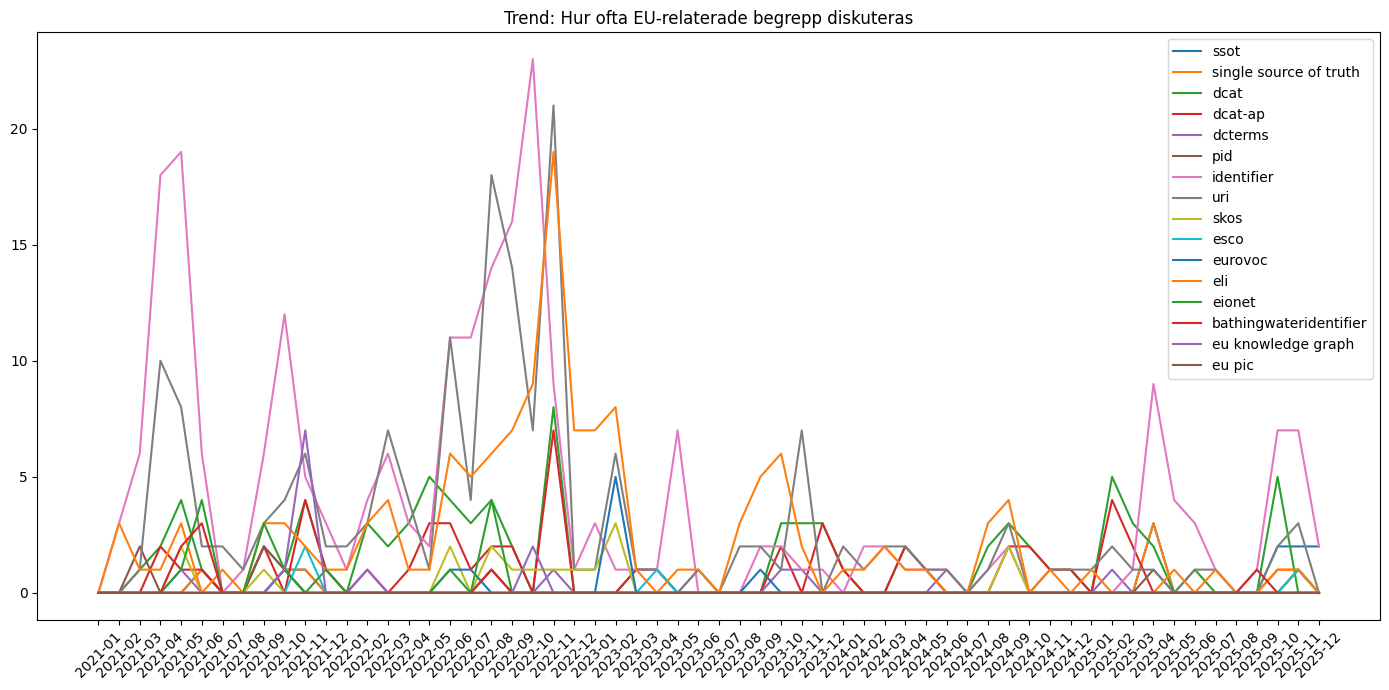

In [5]:
plt.figure(figsize=(14,7))
for term in eu_terms:
    plt.plot(term_matrix.index, term_matrix[term], label=term)

plt.legend()
plt.title("Trend: Hur ofta EU‑relaterade begrepp diskuteras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eu_terms_trends.png", dpi=200)
plt.show()


In [6]:
drivers = {}

for term in eu_terms:
    subset = df[df["content_text_norm"].str.contains(term)]
    drivers[term] = subset["username_norm"].value_counts().head(10)

driver_df = pd.DataFrame(drivers).fillna(0)
driver_df.to_csv("eu_term_drivers.csv")
driver_df


,ssot,single source of truth,dcat,dcat-ap,dcterms,pid,identifier,uri,skos,esco,eurovoc,eli,eionet,bathingwateridentifier,eu knowledge graph,eu pic
username_norm,,,,,,,,,,,,,,,,
ainali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
almeta,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
andreas sundberg,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
björn hagström,0.0,0.0,8.0,8.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
broninnovation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
davidlars,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
davidnorman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
digg_admin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
elias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


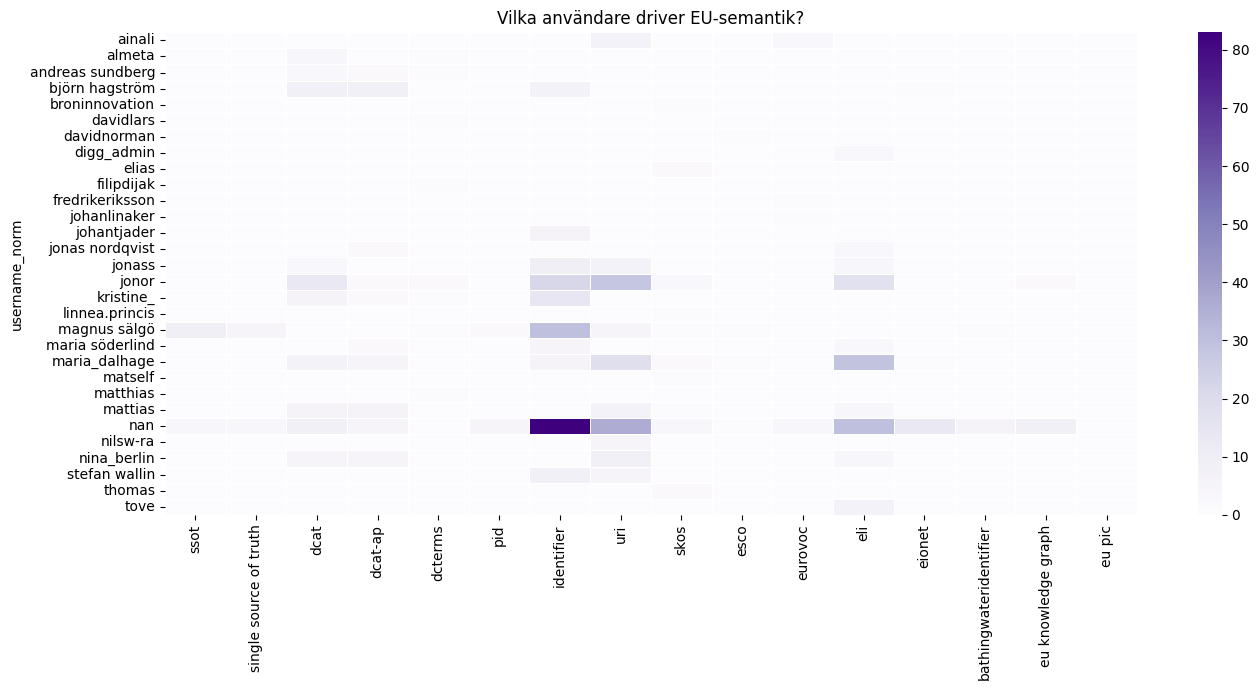

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(driver_df, cmap="Purples", linewidths=.5)
plt.title("Vilka användare driver EU‑semantik?")
plt.tight_layout()
plt.savefig("eu_term_drivers_heatmap.png", dpi=200)
plt.show()


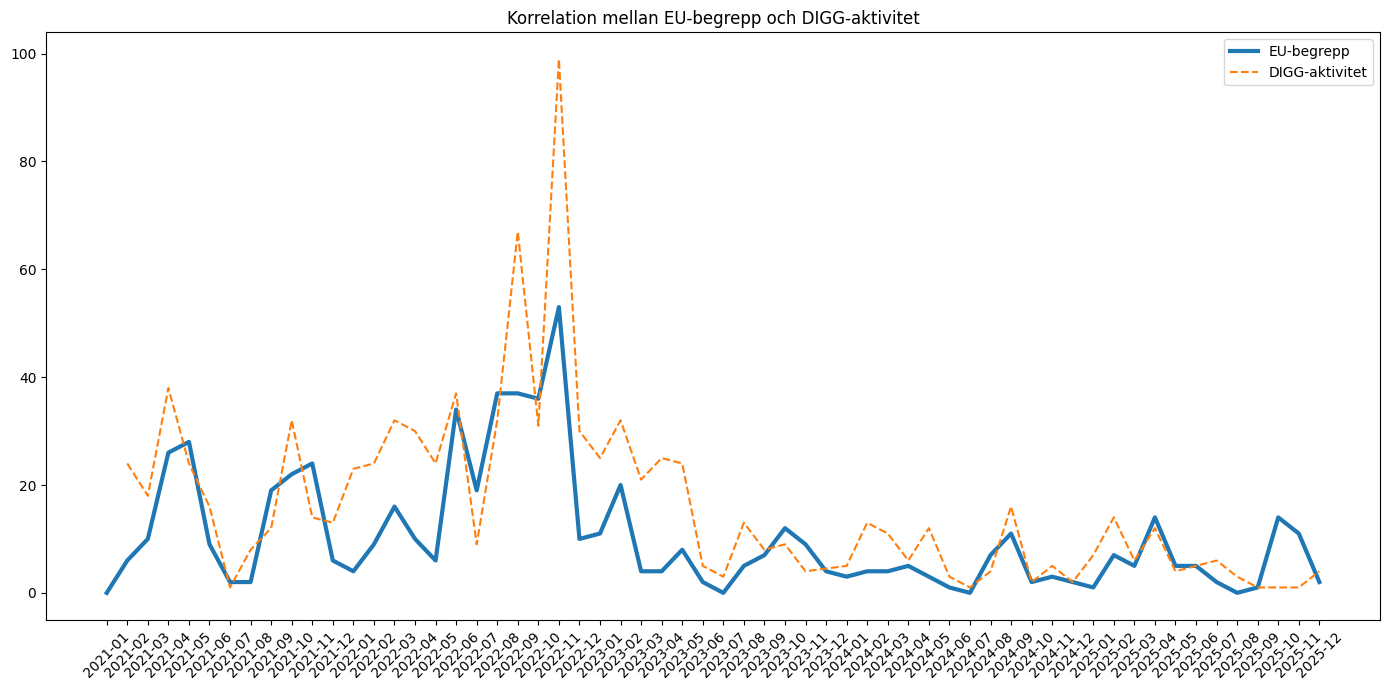

In [8]:
df["has_eu_term"] = df["content_text_norm"].apply(
    lambda t: any(term in t for term in eu_terms)
)

monthly_eu = df.groupby("post_month")["has_eu_term"].sum()
monthly_digg = df[df["is_digg"]==True].groupby("post_month")["pid"].count()

plt.figure(figsize=(14,7))
plt.plot(monthly_eu.index, monthly_eu.values, label="EU-begrepp", linewidth=3)
plt.plot(monthly_digg.index, monthly_digg.values, label="DIGG-aktivitet", linestyle="--")
plt.legend()
plt.title("Korrelation mellan EU‑begrepp och DIGG‑aktivitet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("digg_vs_eu_terms.png", dpi=200)
plt.show()


# PDF

In [9]:
# =============================================================================
# EU-semantik / SSOT / DCAT-AP / PID / "tyst teknisk skuld" - Dashboard
# Bygger grafer + PDF från forum_data.json
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import re

# -------------------------------------------------------------------------
# 0. Grundinställningar
# -------------------------------------------------------------------------
plt.rcParams["figure.dpi"] = 120
OUT_DIR = Path("figures_eu_semantik")
OUT_DIR.mkdir(exist_ok=True)
PDF_PATH = Path("eu_semantik_dashboard.pdf")

def save_fig(name):
    path = OUT_DIR / name
    plt.tight_layout()
    plt.savefig(path, dpi=200)
    plt.close()
    return str(path)

saved_pngs = []

# -------------------------------------------------------------------------
# 1. Läs data & grundpreppa
# -------------------------------------------------------------------------
df = pd.read_json("forum_data.json")

# Säkerställ tid
df["post_time"] = pd.to_datetime(df["post_timestamp"], errors="coerce")
df = df.dropna(subset=["post_time"]).copy()
df["post_month"] = df["post_time"].dt.to_period("M").astype(str)

# HTML -> text
def html_to_text(x):
    if pd.isna(x):
        return ""
    return BeautifulSoup(str(x), "html.parser").get_text(" ", strip=True)

df["content_text"] = df["content_html"].apply(html_to_text)
df["content_text_norm"] = df["content_text"].astype(str).str.lower().fillna("")

# username_norm borde redan finnas, men säkerställ str
df["username_norm"] = df["username_norm"].astype(str).str.strip().str.lower()

# is_digg finns redan hos dig, annars:
# digg_users_norm = {...}
# df["is_digg"] = df["username_norm"].isin(digg_users_norm)

# -------------------------------------------------------------------------
# 2. Definiera termer vi bryr oss om
# -------------------------------------------------------------------------

# Centrala termer runt teknisk skuld / semantik / EU
TRACK_TERMS = [
    # arkitektur / styrning / basbegrepp
    "ssot", "single source of truth",
    "dcat", "dcat-ap", "dcterms",
    "pid", "identifierare", "identifier", "persistent identifier",
    "uri", "urn",
    "skos", "linked data", "länkad data",
    "kontrollerad vokabulär", "kontrollerade vokabulär",
    "metadata", "metadatakvalitet", "datakvalitet",

    # EU / vokabulärer / ID
    "eli", "eionet", "bathingwateridentifier",
    "eu knowledge graph", "eu pic", "eurovoc", "esco",

    # buzzwords (för kontrast)
    "ai", "artificial intelligence", "machine learning", "ml"
]

# Ta bort dubbletter men behåll ordning
seen = set()
TERMS = []
for t in TRACK_TERMS:
    if t not in seen:
        TERMS.append(t)
        seen.add(t)

# -------------------------------------------------------------------------
# 3. Räknar förekomst per månad (posts som nämner termen minst 1 gång)
# -------------------------------------------------------------------------
term_counts = pd.DataFrame(index=sorted(df["post_month"].unique()), columns=TERMS)
term_counts[:] = 0

for term in TERMS:
    # bool per rad: nämns termen i texten?
    mask = df["content_text_norm"].str.contains(term, na=False)
    per_month = df[mask].groupby("post_month")["pid"].count()
    term_counts.loc[per_month.index, term] = per_month

term_counts = term_counts.sort_index()

# -------------------------------------------------------------------------
# 4. HEATMAP över termer per månad
# -------------------------------------------------------------------------
plt.figure(figsize=(14, 8))
# normalisera lite för bättre kontrast
data = term_counts.T.values.astype(float)
max_val = data.max() if data.max() > 0 else 1.0
plt.imshow(data, aspect="auto", cmap="Blues", vmin=0, vmax=max_val)
plt.colorbar(label="Antal inlägg som nämner termen")

plt.yticks(range(len(TERMS)), TERMS)
plt.xticks(range(len(term_counts.index)), term_counts.index, rotation=45, ha="right")
plt.title("Förekomst av semantik-/EU-begrepp över tid (antal inlägg per månad)")
saved_pngs.append(save_fig("01_eu_terms_heatmap.png"))

# -------------------------------------------------------------------------
# 5. Trendlinjer (några utvalda grupper)
# -------------------------------------------------------------------------
GROUPS = {
    "Arkitektur/styrning": [
        "ssot", "single source of truth",
        "dcat", "dcat-ap",
        "metadata", "metadatakvalitet", "datakvalitet",
        "kontrollerad vokabulär", "kontrollerade vokabulär"
    ],
    "Identifierare": [
        "pid", "identifierare", "identifier", "persistent identifier",
        "uri", "urn"
    ],
    "EU-vokabulärer/ID": [
        "eli", "eionet", "bathingwateridentifier",
        "eu knowledge graph", "eu pic", "eurovoc", "esco"
    ],
    "Buzzwords": [
        "ai", "artificial intelligence", "machine learning", "ml"
    ]
}

plt.figure(figsize=(14, 6))
for label, terms in GROUPS.items():
    valid_terms = [t for t in terms if t in term_counts.columns]
    if not valid_terms:
        continue
    series = term_counts[valid_terms].sum(axis=1)
    plt.plot(term_counts.index, series.values, marker="o", label=label)

plt.title("Trender: grupper av begrepp över tid")
plt.xlabel("Månad")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=45, ha="right")
plt.legend()
saved_pngs.append(save_fig("02_term_groups_trends.png"))

# -------------------------------------------------------------------------
# 6. Vem driver begreppen? (top 10 per term)
# -------------------------------------------------------------------------
driver_dict = {}
for term in TERMS:
    subset = df[df["content_text_norm"].str.contains(term, na=False)]
    vc = subset["username_norm"].value_counts().head(10)
    driver_dict[term] = vc

driver_df = pd.DataFrame(driver_dict).fillna(0).astype(int)
driver_df.to_csv(OUT_DIR / "eu_term_drivers.csv")

plt.figure(figsize=(14, 8))
data = driver_df.values.astype(float)
max_val = data.max() if data.max() > 0 else 1.0
plt.imshow(data, aspect="auto", cmap="Purples", vmin=0, vmax=max_val)
plt.colorbar(label="Antal inlägg")

plt.yticks(range(len(driver_df.index)), driver_df.index)
plt.xticks(range(len(driver_df.columns)), driver_df.columns, rotation=45, ha="right")
plt.title("Vilka användare driver respektive begrepp?")
saved_pngs.append(save_fig("03_term_drivers_heatmap.png"))

# -------------------------------------------------------------------------
# 7. DIGG-aktivitet vs EU/semantik-termer
# -------------------------------------------------------------------------
if "is_digg" in df.columns:
    eu_any_terms = [
        "ssot", "single source of truth", "dcat", "dcat-ap",
        "pid", "identifier", "identifierare", "persistent identifier",
        "uri", "skos", "esco", "eurovoc", "eli", "eionet",
        "bathingwateridentifier", "eu knowledge graph", "eu pic"
    ]
    def has_any_eu(text):
        return any(t in text for t in eu_any_terms)

    df["has_eu_semantik"] = df["content_text_norm"].apply(has_any_eu)

    monthly_eu = df.groupby("post_month")["has_eu_semantik"].sum()
    monthly_digg = df[df["is_digg"]].groupby("post_month")["pid"].count()
    # align
    idx = sorted(set(monthly_eu.index) | set(monthly_digg.index))
    eu_vals = monthly_eu.reindex(idx, fill_value=0)
    digg_vals = monthly_digg.reindex(idx, fill_value=0)

    plt.figure(figsize=(14, 6))
    plt.plot(idx, eu_vals.values, marker="o", label="Inlägg som nämner EU/semantik-termer")
    plt.plot(idx, digg_vals.values, marker="o", linestyle="--", label="DIGG-inlägg")
    plt.title("DIGG-aktivitet vs EU-/semantik-termer i forumet")
    plt.xlabel("Månad")
    plt.ylabel("Antal inlägg")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    saved_pngs.append(save_fig("04_digg_vs_eu_semantik.png"))

# -------------------------------------------------------------------------
# 8. EU-mognadsindex 0–3 per månad
# -------------------------------------------------------------------------
# nivå 0 = buzzwords, 1 = arkitektur/styrning, 2 = EU-koncept, 3 = tydliga implementationer/URI:er
LEVEL_TERMS = {
    0: ["ai", "artificial intelligence", "machine learning", "ml", "data science", "innovation"],
    1: ["api", "apifirst", "api-first", "rest", "openapi",
        "dcat", "dcat-ap", "dcterms",
        "metadata", "datakvalitet", "metadatakvalitet",
        "ssot", "single source of truth",
        "skos", "linked data", "länkad data",
        "kontrollerad vokabulär", "kontrollerade vokabulär", "ontology", "ontologi"],
    2: ["eli", "eionet", "eurovoc", "esco", "bathingwateridentifier",
        "eu knowledge graph", "eu pic"],
    3: ["data.europa.eu", "publications.europa.eu", "eionet.europa.eu",
        "op.europa.eu", "eurovoc.europa.eu"]
}

# räkna per månad: antal inlägg som nämner något på varje nivå
maturity = pd.DataFrame(index=sorted(df["post_month"].unique()), columns=["lvl0","lvl1","lvl2","lvl3"])
maturity[:] = 0

for lvl, terms in LEVEL_TERMS.items():
    term_pattern = "|".join(re.escape(t) for t in terms)
    mask = df["content_text_norm"].str.contains(term_pattern, na=False)
    counts = df[mask].groupby("post_month")["pid"].count()
    maturity.loc[counts.index, f"lvl{lvl}"] = counts

# beräkna index: viktat genomsnitt av nivåer
num = (0*maturity["lvl0"] +
       1*maturity["lvl1"] +
       2*maturity["lvl2"] +
       3*maturity["lvl3"])
den = maturity[["lvl0","lvl1","lvl2","lvl3"]].sum(axis=1)
den = den.replace(0, np.nan)
maturity["index"] = num / den

plt.figure(figsize=(14, 6))
plt.plot(maturity.index, maturity["index"], marker="o")
plt.ylim(0, 3.1)
plt.title("EU-/arkitektur-mognadsindex i forumdiskussionerna (0–3)")
plt.xlabel("Månad")
plt.ylabel("Index (0=buzz, 3=konkret EU-implementation)")
plt.xticks(rotation=45, ha="right")
saved_pngs.append(save_fig("05_eu_maturity_index.png"))

# Bonus: staplar för nivåer
plt.figure(figsize=(14, 6))
bottom = np.zeros(len(maturity.index))
colors = ["#cccccc","#66c2a5","#fc8d62","#8da0cb"]
for i, lvl in enumerate(["lvl0","lvl1","lvl2","lvl3"]):
    vals = maturity[lvl].fillna(0).values
    plt.bar(maturity.index, vals, bottom=bottom, label=lvl, color=colors[i])
    bottom += vals

plt.title("Antal inlägg per månad och mognadsnivå (0–3)")
plt.xlabel("Månad")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Nivå")
saved_pngs.append(save_fig("06_eu_maturity_levels_stacked.png"))

# -------------------------------------------------------------------------
# 9. Topic-clustering (ML light) på inlägg som rör dessa frågor
# -------------------------------------------------------------------------
# filtrera till inlägg som nämner någon av våra TERMS eller LEVEL_TERMS
all_terms_for_filter = set(TERMS)
for ts in LEVEL_TERMS.values():
    all_terms_for_filter.update(ts)

def has_any_term(text):
    return any(t in text for t in all_terms_for_filter)

df_topics = df[df["content_text_norm"].apply(has_any_term)].copy()

# begränsa storlek för prestanda
MAX_DOCS = 2000
if len(df_topics) > MAX_DOCS:
    df_topics = df_topics.sample(MAX_DOCS, random_state=42)

if len(df_topics) >= 10:
    vectorizer = TfidfVectorizer(min_df=3, max_df=0.7, max_features=3000)
    X = vectorizer.fit_transform(df_topics["content_text_norm"])

    # reducera dimension med SVD till 2D
    svd = TruncatedSVD(n_components=2, random_state=42)
    X_2d = svd.fit_transform(X)

    # KMeans-klustring
    n_clusters = 6
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    labels = km.fit_predict(X)

    df_topics["cluster"] = labels
    df_topics["x"] = X_2d[:,0]
    df_topics["y"] = X_2d[:,1]

    # färg per cluster
    plt.figure(figsize=(8, 8))
    for k in range(n_clusters):
        subset = df_topics[df_topics["cluster"] == k]
        plt.scatter(subset["x"], subset["y"], s=10, alpha=0.6, label=f"Kluster {k}")

    plt.title("Topic-clustering av inlägg om semantik/EU/SSOT/DCAT")
    plt.xlabel("Komponent 1")
    plt.ylabel("Komponent 2")
    plt.legend()
    saved_pngs.append(save_fig("07_topic_clustering_semantik.png"))

# -------------------------------------------------------------------------
# 10. Bygg samlad PDF-dashboard
# -------------------------------------------------------------------------
with PdfPages(PDF_PATH) as pdf:
    # Titelsida
    fig = plt.figure(figsize=(11.7, 8.3))  # A4 landscape
    fig.clf()
    fig.text(0.5, 0.7,
             "Dashboard – Semantik, EU-identifierare och 'tyst teknisk skuld'\nDIGG-forum",
             ha="center", fontsize=16)
    fig.text(0.5, 0.5,
             "Automatiskt genererad från forum_data.json\n"
             "Innehåll: termer över tid, drivande användare, DIGG-aktivitet, EU-mognadsindex, topic-clustering.",
             ha="center", fontsize=10)
    pdf.savefig(fig); plt.close(fig)

    # Lägg in alla PNG som separata sidor
    for png in sorted(OUT_DIR.glob("*.png")):
        img = plt.imread(png)
        fig = plt.figure(figsize=(11.7, 8.3))
        plt.imshow(img)
        plt.axis("off")
        pdf.savefig(fig)
        plt.close(fig)

print("✅ Klart!")
print("PNG-filer i:", OUT_DIR.resolve())
print("PDF-dashboard:", PDF_PATH.resolve())


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/3419177861.py:41: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["post_month"] = df["post_time"].dt.to_period("M").astype(str)
/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/3419177861.py:246: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  den = den.replace(0, np.nan)
/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/3419177861.py:263: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vals = maturity[l

✅ Klart!
PNG-filer i: /Users/salgo/Documents/GitHub/DIGG-skuggbacklog/Notebook/figures_eu_semantik
PDF-dashboard: /Users/salgo/Documents/GitHub/DIGG-skuggbacklog/Notebook/eu_semantik_dashboard.pdf


### 🟥 1. KLUSTERBESKRIVNINGAR (automatiskt genererade)
Här plockar vi fram topp‑ord per kluster och tolkar dem.
Det ger dig ”ämnesetiketter” på klustren – exakt det som topic modeling gör.



In [10]:
# anta att df_topics innehåller dina inlägg + kluster
# df_topics columns: content_text, cluster

from sklearn.feature_extraction.text import TfidfVectorizer

cluster_descriptions = {}

for c in sorted(df_topics["cluster"].unique()):
    texts = df_topics[df_topics["cluster"] == c]["content_text"].tolist()
    if len(texts) < 5:
        continue
    
    vect = TfidfVectorizer(max_features=25, stop_words="english")
    X = vect.fit_transform(texts)
    terms = vect.get_feature_names_out()
    
    # topp-ord
    avg_tf_idf = X.mean(axis=0).A1
    top_idx = avg_tf_idf.argsort()[::-1][:15]
    
    cluster_descriptions[c] = [terms[i] for i in top_idx]

cluster_descriptions


{0: ['api',
  'att',
  'och',
  'det',
  'för',
  'som',
  'är',
  'på',
  'en',
  'jag',
  'om',
  'se',
  'med',
  'till',
  'inte'],
 1: ['och',
  'https',
  'se',
  'att',
  'för',
  'en',
  'som',
  'det',
  'på',
  'är',
  'data',
  'med',
  'om',
  'till',
  'com'],
 2: ['och',
  'att',
  'vi',
  'som',
  'för',
  'det',
  'på',
  'är',
  'en',
  'av',
  'med',
  'data',
  'till',
  'har',
  'om'],
 3: ['att',
  'det',
  'och',
  'som',
  'är',
  'jag',
  'på',
  'en',
  'med',
  'inte',
  'för',
  'om',
  'data',
  'har',
  'vi'],
 4: ['att',
  'och',
  'det',
  'som',
  'är',
  'en',
  'för',
  'på',
  'jag',
  'med',
  'om',
  'har',
  'till',
  'inte',
  'ett'],
 5: ['data',
  'open',
  'https',
  'eu',
  'och',
  'det',
  'public',
  'att',
  'source',
  'om',
  'digital',
  'som',
  'en',
  'är',
  'jag']}

### ➡️ Nu kan du namnge dem i dina grafer, t.ex.
* Kluster 0: API & teknik
* Kluster 1: Standarder / DCAT-AP
* Kluster 2: Semantik & PID
* Kluster 3: EU‑identifierare & vokabulärer
* Kluster 4: Styrning / SSOT / governance
* Kluster 5: Support / felsökning

## 🟦 2. TIDSERIE PER KLUSTER
Det här visar vilka ämnen som växer eller dör.
Superviktigt för “early warning” och governance‑signaler.

/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/2592946594.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_topics["post_month"] = df_topics["post_time"].dt.to_period("M").astype(str)


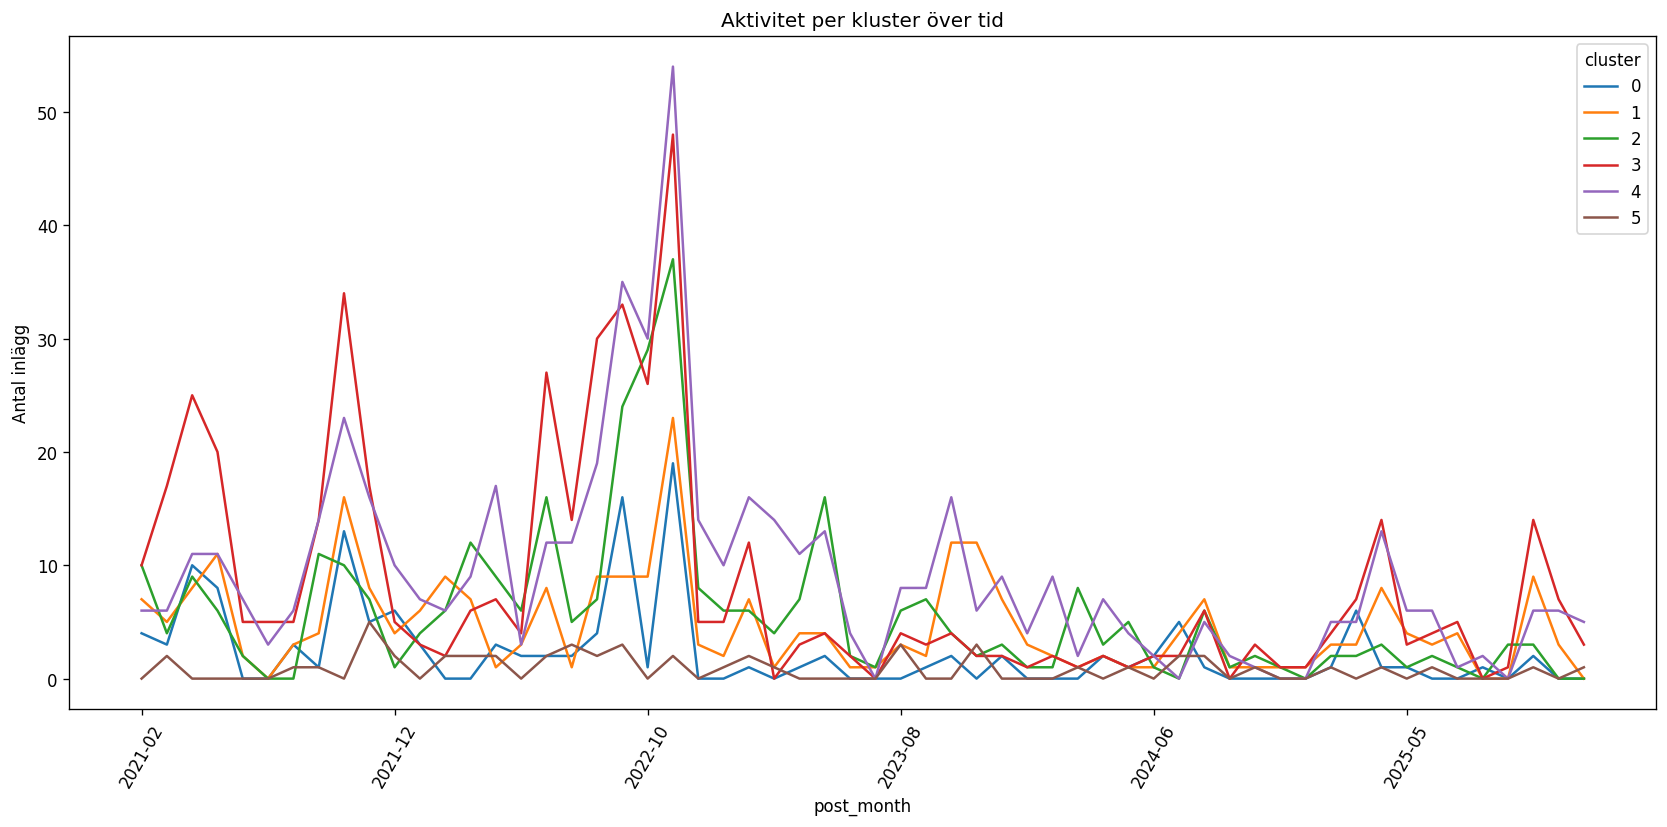

In [11]:
df_topics["post_month"] = df_topics["post_time"].dt.to_period("M").astype(str)

cluster_trend = (
    df_topics.groupby(["post_month", "cluster"])["pid"]
    .count()
    .reset_index()
    .pivot(index="post_month", columns="cluster", values="pid")
    .fillna(0)
)

cluster_trend.plot(kind="line", figsize=(14,7))
plt.title("Aktivitet per kluster över tid")
plt.ylabel("Antal inlägg")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


## 🟩 3. VEM DRIVER RESPEKTIVE KLUSTER?
Här ser vi vilka personer som trycker inlägg i varje ämnesfamilj.
Det är extremt värdefullt i governance‑analyser.



In [12]:
cluster_drivers = (
    df_topics.groupby(["cluster", "username_norm"])["pid"]
    .count()
    .reset_index()
)

top_drivers = {}

for c in sorted(df_topics["cluster"].unique()):
    sub = cluster_drivers[cluster_drivers["cluster"] == c]
    top = sub.sort_values("pid", ascending=False).head(10)
    top_drivers[c] = top

top_drivers


{0:     cluster    username_norm  pid
 13        0           jonass   19
 23        0              nan   18
 18        0    maria_dalhage   14
 15        0        kristine_   11
 31        0    stefan wallin    9
 14        0            jonor    9
 17        0         lmdaniel    5
 0         0           ainali    5
 12        0  jonas nordqvist    5
 24        0      nina_berlin    4,
 1:     cluster   username_norm  pid
 79        1             nan   40
 75        1   maria_dalhage   37
 64        1           jonor   36
 77        1         mattias   21
 63        1          jonass   18
 47        1  björn hagström    9
 72        1    magnus sälgö    8
 41        1          almeta    7
 57        1     jamespether    7
 66        1       kristine_    6,
 2:      cluster    username_norm  pid
 145        2    maria_dalhage   96
 137        2        kristine_   21
 121        2  fredrikeriksson   21
 153        2      nina_berlin   19
 134        2     josefinlassi   17
 112        2 

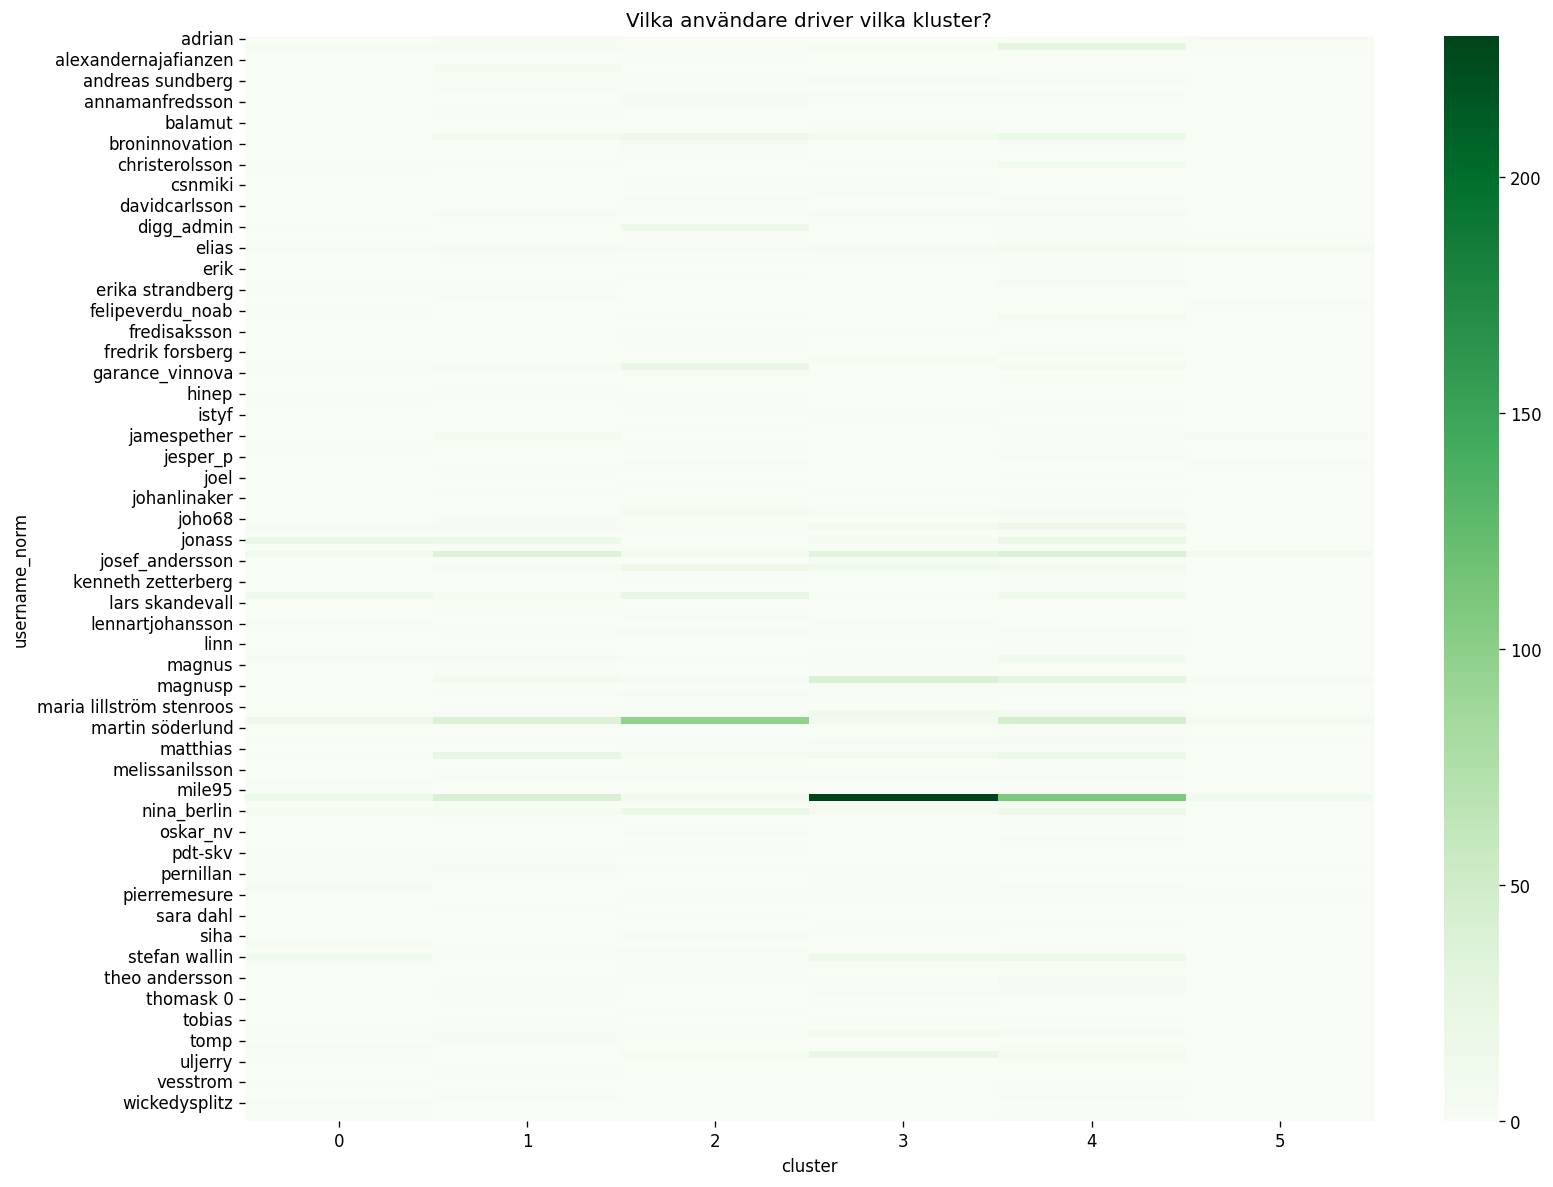

In [13]:
driver_matrix = cluster_drivers.pivot(index="username_norm", columns="cluster", values="pid").fillna(0)

plt.figure(figsize=(14,10))
sns.heatmap(driver_matrix, cmap="Greens")
plt.title("Vilka användare driver vilka kluster?")
plt.tight_layout()
plt.show()


In [14]:
metadata_terms = [
    "dcat", "dcat-ap", "dcterms", "publisher", "distribution",
    "format", "license", "keyword"
]

pid_terms = [
    "pid", "identifier", "uri", "eli", "skos", "eurovoc",
    "esco", "eionet", "bathingwateridentifier"
]

governance_terms = [
    "ssot", "single source of truth", "ansvar",
    "styrning", "governance", "technical debt"
]


In [15]:
def count_terms(df, term_list):
    return df["content_text_norm"].apply(
        lambda t: any(term in t for term in term_list)
    ).sum()

monthly_groups = df.groupby("post_month")

monthly_metadata = monthly_groups.apply(lambda x: count_terms(x, metadata_terms))
monthly_pid = monthly_groups.apply(lambda x: count_terms(x, pid_terms))
monthly_gov = monthly_groups.apply(lambda x: count_terms(x, governance_terms))
monthly_users = monthly_groups["username_norm"].nunique()


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/1025283953.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_metadata = monthly_groups.apply(lambda x: count_terms(x, metadata_terms))
/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_39943/1025283953.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_pid = monthly_groups.apply(lambda x: count_terms(x, pid_terms))


In [16]:
import numpy as np

df_index = pd.DataFrame({
    "metadata": monthly_metadata,
    "pid": monthly_pid,
    "governance": monthly_gov,
    "users": monthly_users
})

# normalisera per kolumn
df_norm = df_index.apply(lambda col: col / col.max())

# EU-mognadsindex = genomsnitt * 3
df_norm["eu_maturity"] = df_norm.mean(axis=1) * 3


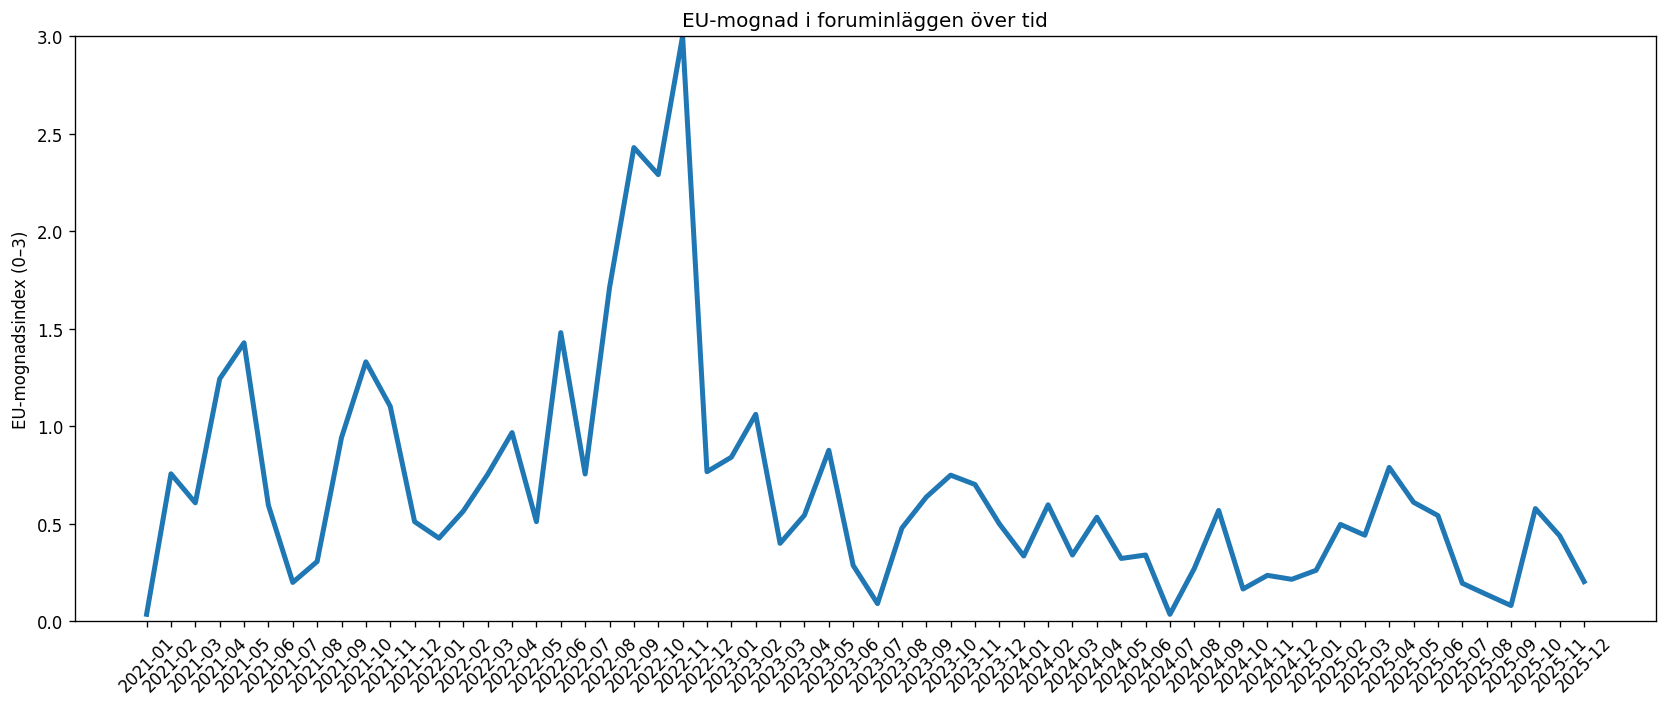

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df_norm.index, df_norm["eu_maturity"], linewidth=3)

plt.ylim(0, 3)
plt.ylabel("EU‑mognadsindex (0–3)")
plt.title("EU‑mognad i foruminläggen över tid")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("eu_maturity_index.png", dpi=200)
plt.show()


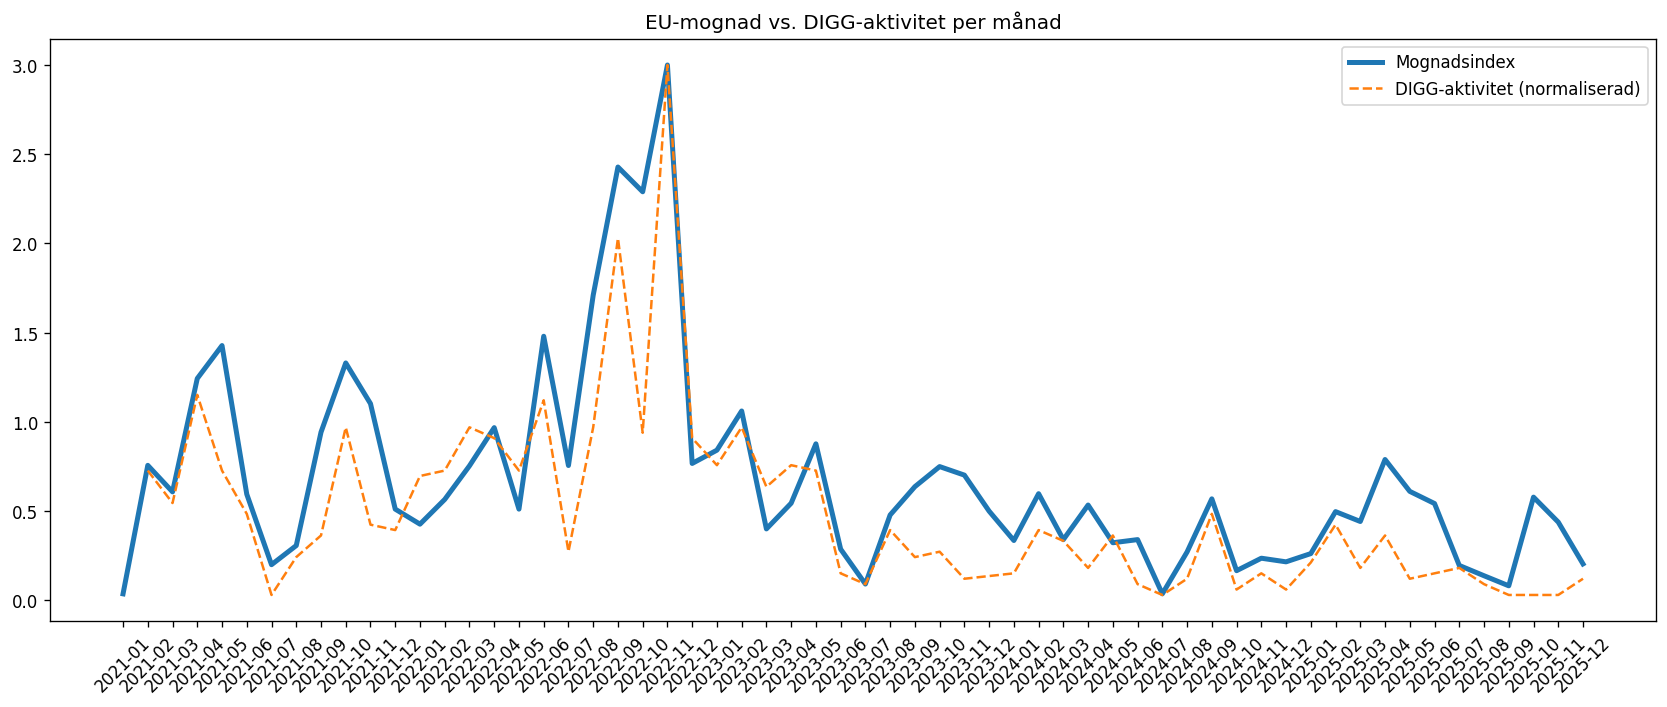

In [18]:
plt.figure(figsize=(14,6))
plt.plot(df_norm.index, df_norm["eu_maturity"], label="Mognadsindex", linewidth=3)
plt.plot(monthly_digg.index, monthly_digg.values / monthly_digg.max() * 3,
         label="DIGG‑aktivitet (normaliserad)", linestyle="--")
plt.legend()
plt.title("EU‑mognad vs. DIGG‑aktivitet per månad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eu_maturity_vs_digg.png", dpi=200)
plt.show()


In [3]:
 # End timer and calculate duration
end_time = time.time()
elapsed_time = end_time - start_time# Bygg audit-lager för den här etappen

# Print current date and total time
print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
minutes, seconds = divmod(elapsed_time, 60)
print("Total time elapsed: {:02.0f} minutes {:05.2f} seconds".format(minutes, seconds))


Date: 2025-12-05 05:35:22
Total time elapsed: 04 minutes 55.69 seconds
